# Final Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the customer data
df_customers = pd.read_csv('maven_music_customers.csv')

In [3]:
# Read in the listening history
df_listen_history = pd.read_excel('maven_music_listening_history.xlsx', sheet_name = 'listening_history')

In [4]:
# Read in the audio data
df_audio = pd.read_excel('maven_music_listening_history.xlsx', sheet_name = 'audio_files')

In [5]:
# Read in the session data
df_session = pd.read_excel('maven_music_listening_history.xlsx', sheet_name = 'session_login_time')

In [6]:
df_customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [7]:
df_listen_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [8]:
df_audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [9]:
df_session.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [10]:
# Check the data types
df_customers.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [11]:
df_listen_history.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [12]:
df_audio.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [13]:
df_session.dtypes

Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

In [14]:
# Convert objects to numeric and datetime fields
df_customers['Member Since'] = pd.to_datetime(df_customers['Member Since'])
temp = df_customers['Subscription Rate'].str.replace('$','')
df_customers['Subscription Rate'] = pd.to_numeric(temp)
df_customers['Cancellation Date'] = pd.to_datetime(df_customers['Cancellation Date'])

C:\Users\luffy\AppData\Local\Temp\ipykernel_31100\1136408421.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_customers['Member Since'] = pd.to_datetime(df_customers['Member Since'])
C:\Users\luffy\AppData\Local\Temp\ipykernel_31100\1136408421.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_customers['Cancellation Date'] = pd.to_datetime(df_customers['Cancellation Date'])


### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [15]:
# Look for NaN values in the customers
df_customers.isna().sum()

Customer ID           0
Customer Name         0
Email                 0
Member Since          0
Subscription Plan     5
Subscription Rate     0
Discount?            23
Cancellation Date    17
dtype: int64

In [16]:
# Look for NaN values in the listening history
df_listen_history.isna().sum()

Customer ID    0
Session ID     0
Audio Order    0
Audio ID       0
Audio Type     0
dtype: int64

In [17]:
# Look for NaN values in the audio
df_audio.isna().sum()

ID            0
Name          0
Genre         0
Popularity    0
dtype: int64

In [18]:
# Look for NaN values in the session
df_session.isna().sum()

Session ID             0
Session Log In Time    0
dtype: int64

In [19]:
df_customers[df_customers.isnull().any(axis = 1)]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,NaN,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,NaN,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,NaN,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,NaN,NaT


In [20]:
df_customers['Discount?'].value_counts()

Discount?
Yes    7
Name: count, dtype: int64

In [21]:
df_customers['Discount?'] = np.where(df_customers['Discount?'].isna(), 'No', df_customers['Discount?'])

In [22]:
df_customers[df_customers['Subscription Plan'].isnull()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,No,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,No,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,No,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,No,2023-06-03
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,No,NaT


In [23]:
df_customers['Subscription Plan'] = np.where(((df_customers['Subscription Plan'].isna()) & (df_customers['Subscription Rate'] == 2.99)), 'Basic (Ads)', df_customers['Subscription Plan'])

#### ii. Inconsistent Text & Typos

In [24]:
# Look for inconsistent text & typos
df_customers.describe()

,Customer ID,Member Since,Subscription Rate,Cancellation Date
count,30.000000,30,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,8.556667,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,99.990000,2023-06-03 00:00:00
std,814.255587,NaN,17.517840,NaN


In [25]:
df_customers['Subscription Rate'].value_counts()

Subscription Rate
2.99     17
7.99      7
9.99      5
99.99     1
Name: count, dtype: int64

In [26]:
df_customers['Subscription Rate'] = np.where(df_customers['Subscription Rate'] == 99.99, 9.99, df_customers['Subscription Rate'])

In [27]:
df_listen_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [28]:
df_audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [29]:
df_session.describe()

,Session ID,Session Log In Time
count,90.000000,90
mean,105619.788889,2023-04-27 08:18:34.000000512
min,100520.000000,2023-03-13 14:14:00
25%,102149.000000,2023-04-05 21:21:30
50%,105390.500000,2023-05-03 20:03:00
75%,109658.250000,2023-05-18 22:17:30
max,111333.000000,2023-05-31 06:03:00
std,3616.208569,NaN


In [30]:
df_audio.Genre = np.where(df_audio.Genre == 'Pop Music','Pop',df_audio.Genre)

In [31]:
df_audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52


#### iii. Duplicate Rows

In [32]:
# Look for duplicate rows
df_customers.duplicated().sum()

0

In [33]:
df_listen_history.duplicated().sum()

0

In [34]:
df_audio.duplicated().sum()

0

In [35]:
df_session.duplicated().sum()

0

#### iv. Outliers

In [36]:
# Look for outliers

### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [37]:
# Create a 'Cancelled' column
df_customers['Cancelled'] = np.where(df_customers['Cancellation Date'].notna(),1,0)

In [38]:
# Create an updated 'Email' column without the Email: portion
df_customers['Email'] = df_customers['Email'].str[6:]

In [39]:
# Create an updated 'Discount?' column with Yes=1 and No=0
df_customers['Discount?'] = np.where(df_customers['Discount?'] == 'No', 0, 1)

## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [40]:
df_customers[df_customers['Cancellation Date'].notna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02,1
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,0,2023-06-01,1
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),9.99,0,2023-06-02,1
19,6588,Harmony Bass,bass.harmony@email.com,2023-04-16,Basic (Ads),2.99,0,2023-06-01,1
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1


In [41]:
# How long were customers members before they cancelled?
time_before_cancel =  (df_customers['Cancellation Date'] - df_customers['Member Since']).mean()
time_before_cancel

Timedelta('46 days 07:23:04.615384615')

In [42]:
# Cancellation rate for those who had a discount

discount_cancelled = df_customers[df_customers['Discount?'] == 1]
discount_cancelled.Cancelled.sum()/discount_cancelled.Cancelled.count()*100

85.71428571428571

In [43]:
# Cancellation rate for those who did not have a discount
no_discount_cancelled = df_customers[df_customers['Discount?'] == 0]
no_discount_cancelled.Cancelled.sum()/no_discount_cancelled.Cancelled.count()*100

30.434782608695656

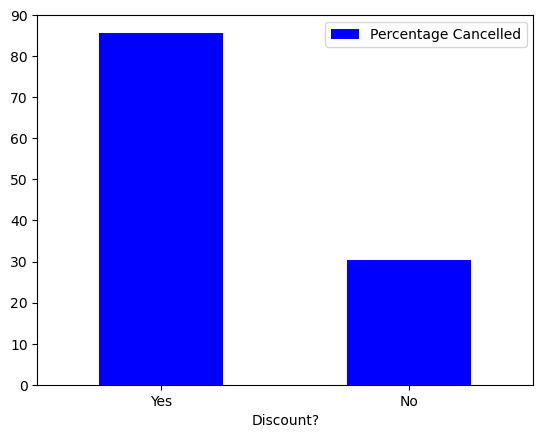

In [44]:
# Visualize the cancellation rate for those with a discount vs those without a discount
pd.DataFrame([["Yes" ,85.71428571428571],
             ["No",30.434782608695656]],
            columns = ["Discount?","Percentage Cancelled"]).plot.bar(x = "Discount?",y = "Percentage Cancelled", color = "blue");
plt.xticks(rotation = 0);



Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [45]:
# Split the ID in the audio data so the column can be joined with other tables
temp_audio = pd.DataFrame(df_audio.ID.str.split('-').to_list()).rename(columns = {0: 'Type',1: 'New_Id'})
new_audio = pd.concat([temp_audio,df_audio], axis = 1)
new_audio.head()

,Type,New_Id,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop,5
3,Song,104,Song-104,Glowing Hearts,Pop,10
4,Song,105,Song-105,Pop Rocks,Pop,52


In [46]:
# Hint: Check the data type of Audio ID in the audio table
new_audio.dtypes
new_audio.New_Id = pd.to_numeric(new_audio.New_Id)

In [47]:
new_audio.dtypes

Type          object
New_Id         int64
ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [48]:
# The number of listening sessions that each customer had in the past 3 months
df_listen_history.groupby('Customer ID')['Session ID'].nunique()

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
5404    1
5581    3
5759    2
5761    3
5763    6
5826    3
5827    1
6029    2
6092    3
6163    3
6229    2
6406    3
6584    2
6586    2
6588    3
6821    2
6822    3
6824    4
7087    3
7158    3
7224    4
7401    3
7579    2
7581    2
7583    1
Name: Session ID, dtype: int64

In [49]:
# The most popular genres that customers listened to
new_df = df_listen_history.merge(new_audio, how = 'left', left_on = 'Audio ID', right_on = 'New_Id')
new_df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,New_Id,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,101,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,102,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,103,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,104,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,105,Song-105,Pop Rocks,Pop,52


In [50]:
new_df.Genre.value_counts()

Genre
Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [51]:
# Create a dataframe ready for modeling
model = df_customers[['Customer ID','Cancelled','Discount?']]
model.head()

,Customer ID,Cancelled,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0


In [52]:
# Calculate the number of listening sessions for each customer
number_of_listening_sessions = new_df.groupby('Customer ID')['Session ID'].nunique()
number_of_listening_sessions.head()

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
Name: Session ID, dtype: int64

In [53]:
number_of_listening_sessions = number_of_listening_sessions.to_frame().reset_index().rename(columns ={'Session ID' : 'Total Sessions'})
number_of_listening_sessions.head()

,Customer ID,Total Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [54]:
model = model.merge(number_of_listening_sessions,how = 'left', on = 'Customer ID')
model.head()

,Customer ID,Cancelled,Discount?,Total Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [55]:
# Percent pop
pd.get_dummies(new_df.Genre,dtype = int)

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
500,0,0,0,1,0,0
501,1,0,0,0,0,0
502,0,0,1,0,0,0
503,0,0,1,0,0,0


In [56]:
genre = pd.concat([new_df['Customer ID'],pd.get_dummies(new_df.Genre,dtype = int)], axis = 1).groupby('Customer ID').sum().reset_index()
genre.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0


In [57]:
Total_audio = df_listen_history.groupby('Customer ID')['Audio ID'].count().to_frame().rename(columns={'Audio ID':'Total'}).reset_index()
Total_audio.head()

,Customer ID,Total
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [58]:
audio_final = genre.merge(Total_audio, how = 'left', on = 'Customer ID')

In [59]:
audio_final.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18


In [60]:
model['Percent Pop'] = audio_final.Pop/audio_final.Total *100
model.head()

,Customer ID,Cancelled,Discount?,Total Sessions,Percent Pop
0,5001,0,0,8,56.666667
1,5002,0,0,4,0.000000
2,5004,1,0,1,100.000000
3,5267,0,0,7,51.111111
4,5338,0,0,4,0.000000


In [61]:
model.head()

,Customer ID,Cancelled,Discount?,Total Sessions,Percent Pop
0,5001,0,0,8,56.666667
1,5002,0,0,4,0.000000
2,5004,1,0,1,100.000000
3,5267,0,0,7,51.111111
4,5338,0,0,4,0.000000


In [62]:
# Percent podcasts
model['Percent Podcast'] = ((audio_final['Comedy'] + audio_final['True Crime'])/audio_final.Total)*100

Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

In [63]:
model.corr()

,Customer ID,Cancelled,Discount?,Total Sessions,Percent Pop,Percent Podcast
Customer ID,1.000000,0.269942,0.648514,-0.337083,-0.076129,0.083083
Cancelled,0.269942,1.000000,0.471825,-0.333739,0.585630,-0.035414
Discount?,0.648514,0.471825,1.000000,-0.048877,0.112675,0.062938
Total Sessions,-0.337083,-0.333739,-0.048877,1.000000,-0.131156,-0.125459
Percent Pop,-0.076129,0.585630,0.112675,-0.131156,1.000000,-0.487193
Percent Podcast,0.083083,-0.035414,0.062938,-0.125459,-0.487193,1.000000


* Percent Pop can be a good predictor for model